<center><p float="center">
  <img src="https://img.freepik.com/premium-photo/dj-studio-sound-console-mixing-tracks-processing-sounds_886350-719.jpg" width="500" height="250"/>
</p></center>

<center><font size=10>AI-Powered Music Market Segmentation</center></font>
<center><font size=6>Leveraging PCA and K-Means to Identify Target Audiences</center></font>

---


---



#### Introduction


> In the competitive music industry, understanding distinct market segments and identifying target audiences are essential for success. Platforms like Spotify offer artists and marketers vast amounts of data, but turning that data into actionable insights is challenging. By leveraging advanced techniques such as Principal Component Analysis (PCA) and K-Means clustering, it is possible to categorize songs into distinct market segments based on their audio features and metadata. This allows artists, producers, and marketers to tailor their strategies to specific audience preferences, ensuring optimal reach and engagement.

#### Problem Statement


> Develop a robust market segmentation model using PCA and K-Means clustering to group songs into distinct market segments based on their audio features and metadata. This will help artists, producers, and music marketers identify target audiences and optimize their content and promotional strategies to increase engagement and reach the right listeners.

#### Project Summary


> This project aims to utilize Principal Component Analysis (PCA) and K-Means clustering to segment songs into different market categories based on detailed audio features and metadata. By identifying unique clusters of songs with shared characteristics, stakeholders in the music industry can better understand target markets and craft data-driven strategies. Whether it's refining a track to suit a niche audience, creating more targeted marketing campaigns, or optimizing playlist placements, this segmentation approach will provide crucial insights to maximize the potential of each song within its respective market segment.

# **EDA:** Exploratory Data Analysis


> EDA provides a comprehensive understanding of the dataset, guiding feature engineering and model selection. Thorough data exploration ensures that our predictive model is built on a solid foundation, leading to more accurate and actionable insights.







*   **Data Overview:** Rows and Columns,Data Types,Missing Values.
*   **Descriptive Statistics:** Summary Statistics,Outlier Detection.
*   **Univariate Analysis,Bivariate and Multivariate Analysis:** Distribution Analysis,Categorical Features,Correlation Analysis,Scatter Plots and Pair Plots,Multivariate Analysis.













In [ ]:
# Import necessary libraries
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set seaborn style for better visualizations
sns.set(style="whitegrid")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the full dataset
data = pd.read_csv('/content/drive/MyDrive/data/Copy of Copy of spotify_dataset.csv')
data = data.sample(n=10000, random_state=42)
print(data.shape)

(10000, 20)


In [ ]:
rows,columns=data.shape
print('No. of Rows in this dataset is    :',rows)
print('No. of Columns in this dataset is :',columns)
print()
# Get the count of each data type
dtype_counts = data.dtypes.value_counts()

# Convert the result to a DataFrame
dtype_df = dtype_counts.reset_index()
dtype_df.columns = ['Data Type', 'Count']

print('Data Types of Columns:\n', dtype_df)

No. of Rows in this dataset is    : 10000
No. of Columns in this dataset is : 20

Data Types of Columns:
   Data Type  Count
0   float64      9
1    object      5
2     int64      5
3      bool      1


In [ ]:
num_colms = data.select_dtypes(exclude=object).columns
cat_colms = data.select_dtypes(exclude=np.number).columns

columns_df = pd.DataFrame({'Numerical Columns': pd.Series(num_colms),'Categorical Columns': pd.Series(cat_colms)})

print(columns_df)

   Numerical Columns Categorical Columns
0         popularity            track_id
1        duration_ms              artist
2           explicit               album
3       danceability          track_name
4             energy            explicit
5                key               genre
6           loudness                 NaN
7               mode                 NaN
8        speechiness                 NaN
9       acousticness                 NaN
10  instrumentalness                 NaN
11          liveness                 NaN
12           valence                 NaN
13             tempo                 NaN
14    time_signature                 NaN


In [ ]:
# Create a DataFrame with data types and missing value counts
info_df = pd.DataFrame({
    'Data Type': data.dtypes,
    'Non-Null Count': data.notnull().sum(),
    'Missing Values': data.isnull().sum()
})

# Reset index for a cleaner display
info_df = info_df.reset_index()
info_df.columns = ['Column Name', 'Data Type', 'Non-Null Count', 'Missing Values']

print('Data Types and Missing Values:\n', info_df)

Data Types and Missing Values:
          Column Name Data Type  Non-Null Count  Missing Values
0           track_id    object           10000               0
1             artist    object           10000               0
2              album    object           10000               0
3         track_name    object           10000               0
4         popularity     int64           10000               0
5        duration_ms     int64           10000               0
6           explicit      bool           10000               0
7       danceability   float64           10000               0
8             energy   float64           10000               0
9                key     int64           10000               0
10          loudness   float64           10000               0
11              mode     int64           10000               0
12       speechiness   float64           10000               0
13      acousticness   float64           10000               0
14  instrumentalness   

In [ ]:
# Get the columns of duplicated rows
duplicated_columns = data[data.duplicated()].columns

print('Columns with Duplicate Rows:', duplicated_columns)

Columns with Duplicate Rows: Index(['track_id', 'artist', 'album', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'genre'],
      dtype='object')


In [ ]:
# FIVE POINT SUMMARY
data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,10000.0,33.040000,22.368054,0.00000,17.00000,34.000000,50.0000,100.000
duration_ms,10000.0,228873.029000,112908.413933,17826.00000,174000.00000,212766.500000,262006.5000,4789026.000
danceability,10000.0,0.567909,0.173875,0.00000,0.45800,0.583000,0.6950,0.984
energy,10000.0,0.638943,0.252241,0.00002,0.46975,0.681000,0.8540,1.000
key,10000.0,5.241600,3.575739,0.00000,2.00000,5.000000,8.0000,11.000
loudness,10000.0,-8.294089,5.081669,-43.95700,-10.08025,-6.996000,-5.0250,4.532
mode,10000.0,0.638500,0.480459,0.00000,0.00000,1.000000,1.0000,1.000
speechiness,10000.0,0.085495,0.107882,0.00000,0.03600,0.048900,0.0852,0.958
acousticness,10000.0,0.317375,0.333050,0.00000,0.01640,0.172000,0.6100,0.996
instrumentalness,10000.0,0.157461,0.311158,0.00000,0.00000,0.000042,0.0491,0.999


In [ ]:
data.describe(include=object).T

,count,unique,top,freq
track_id,10000,9731,6lVtX3nLHyWZP7aqU9HuVW,3
artist,10000,6519,George Jones,28
album,10000,7748,All I Want For Christmas Is You,16
track_name,10000,9115,Run Rudolph Run,13
genre,10000,121,indian,108


## **Boxplot Visualization of Outliers**

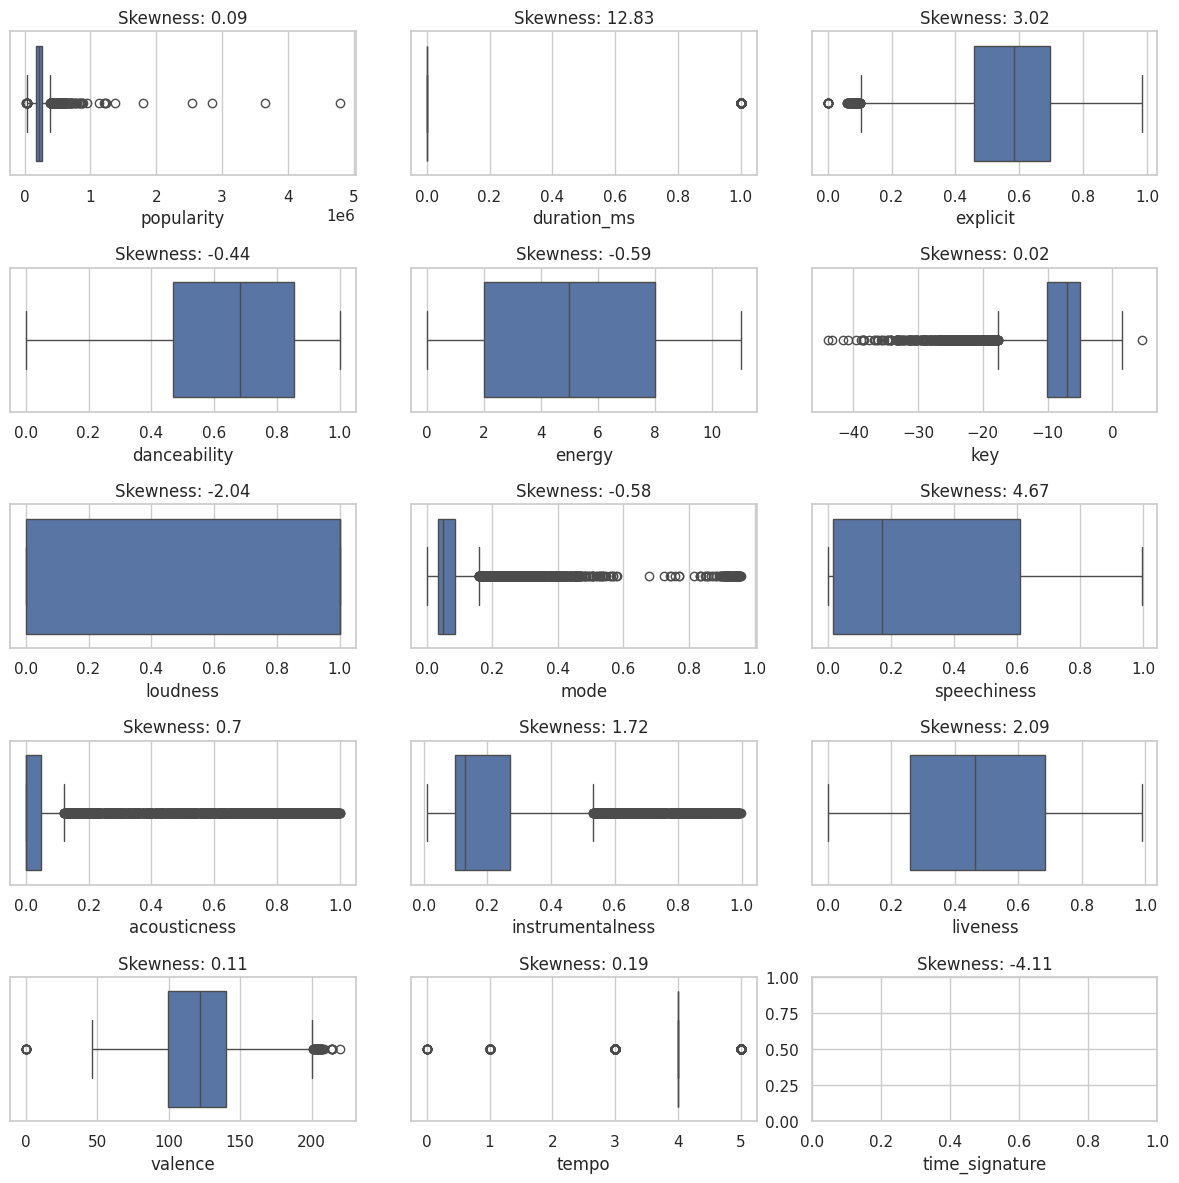

In [ ]:
t=1
plt.figure(figsize=(12,12))
for i in num_colms:
  sns.boxplot(data[i],orient='h')
  plt.subplot(5,3,t)
  plt.xlabel(i)
  plt.title(f'Skewness: {round(data[i].skew(),2)}')
  t+=1
plt.tight_layout()
plt.show()

### ***Inferences:***


> *  Duration, Acousticness, Loudness,  Speechiness exhibit high skewness and significant outliers.
* Low Skewness and Few Outliers: Popularity, Danceability, Energy, Valence, and Tempo have low skewness with fewer outliers.




## **Data Distribution Overview with Distplots**


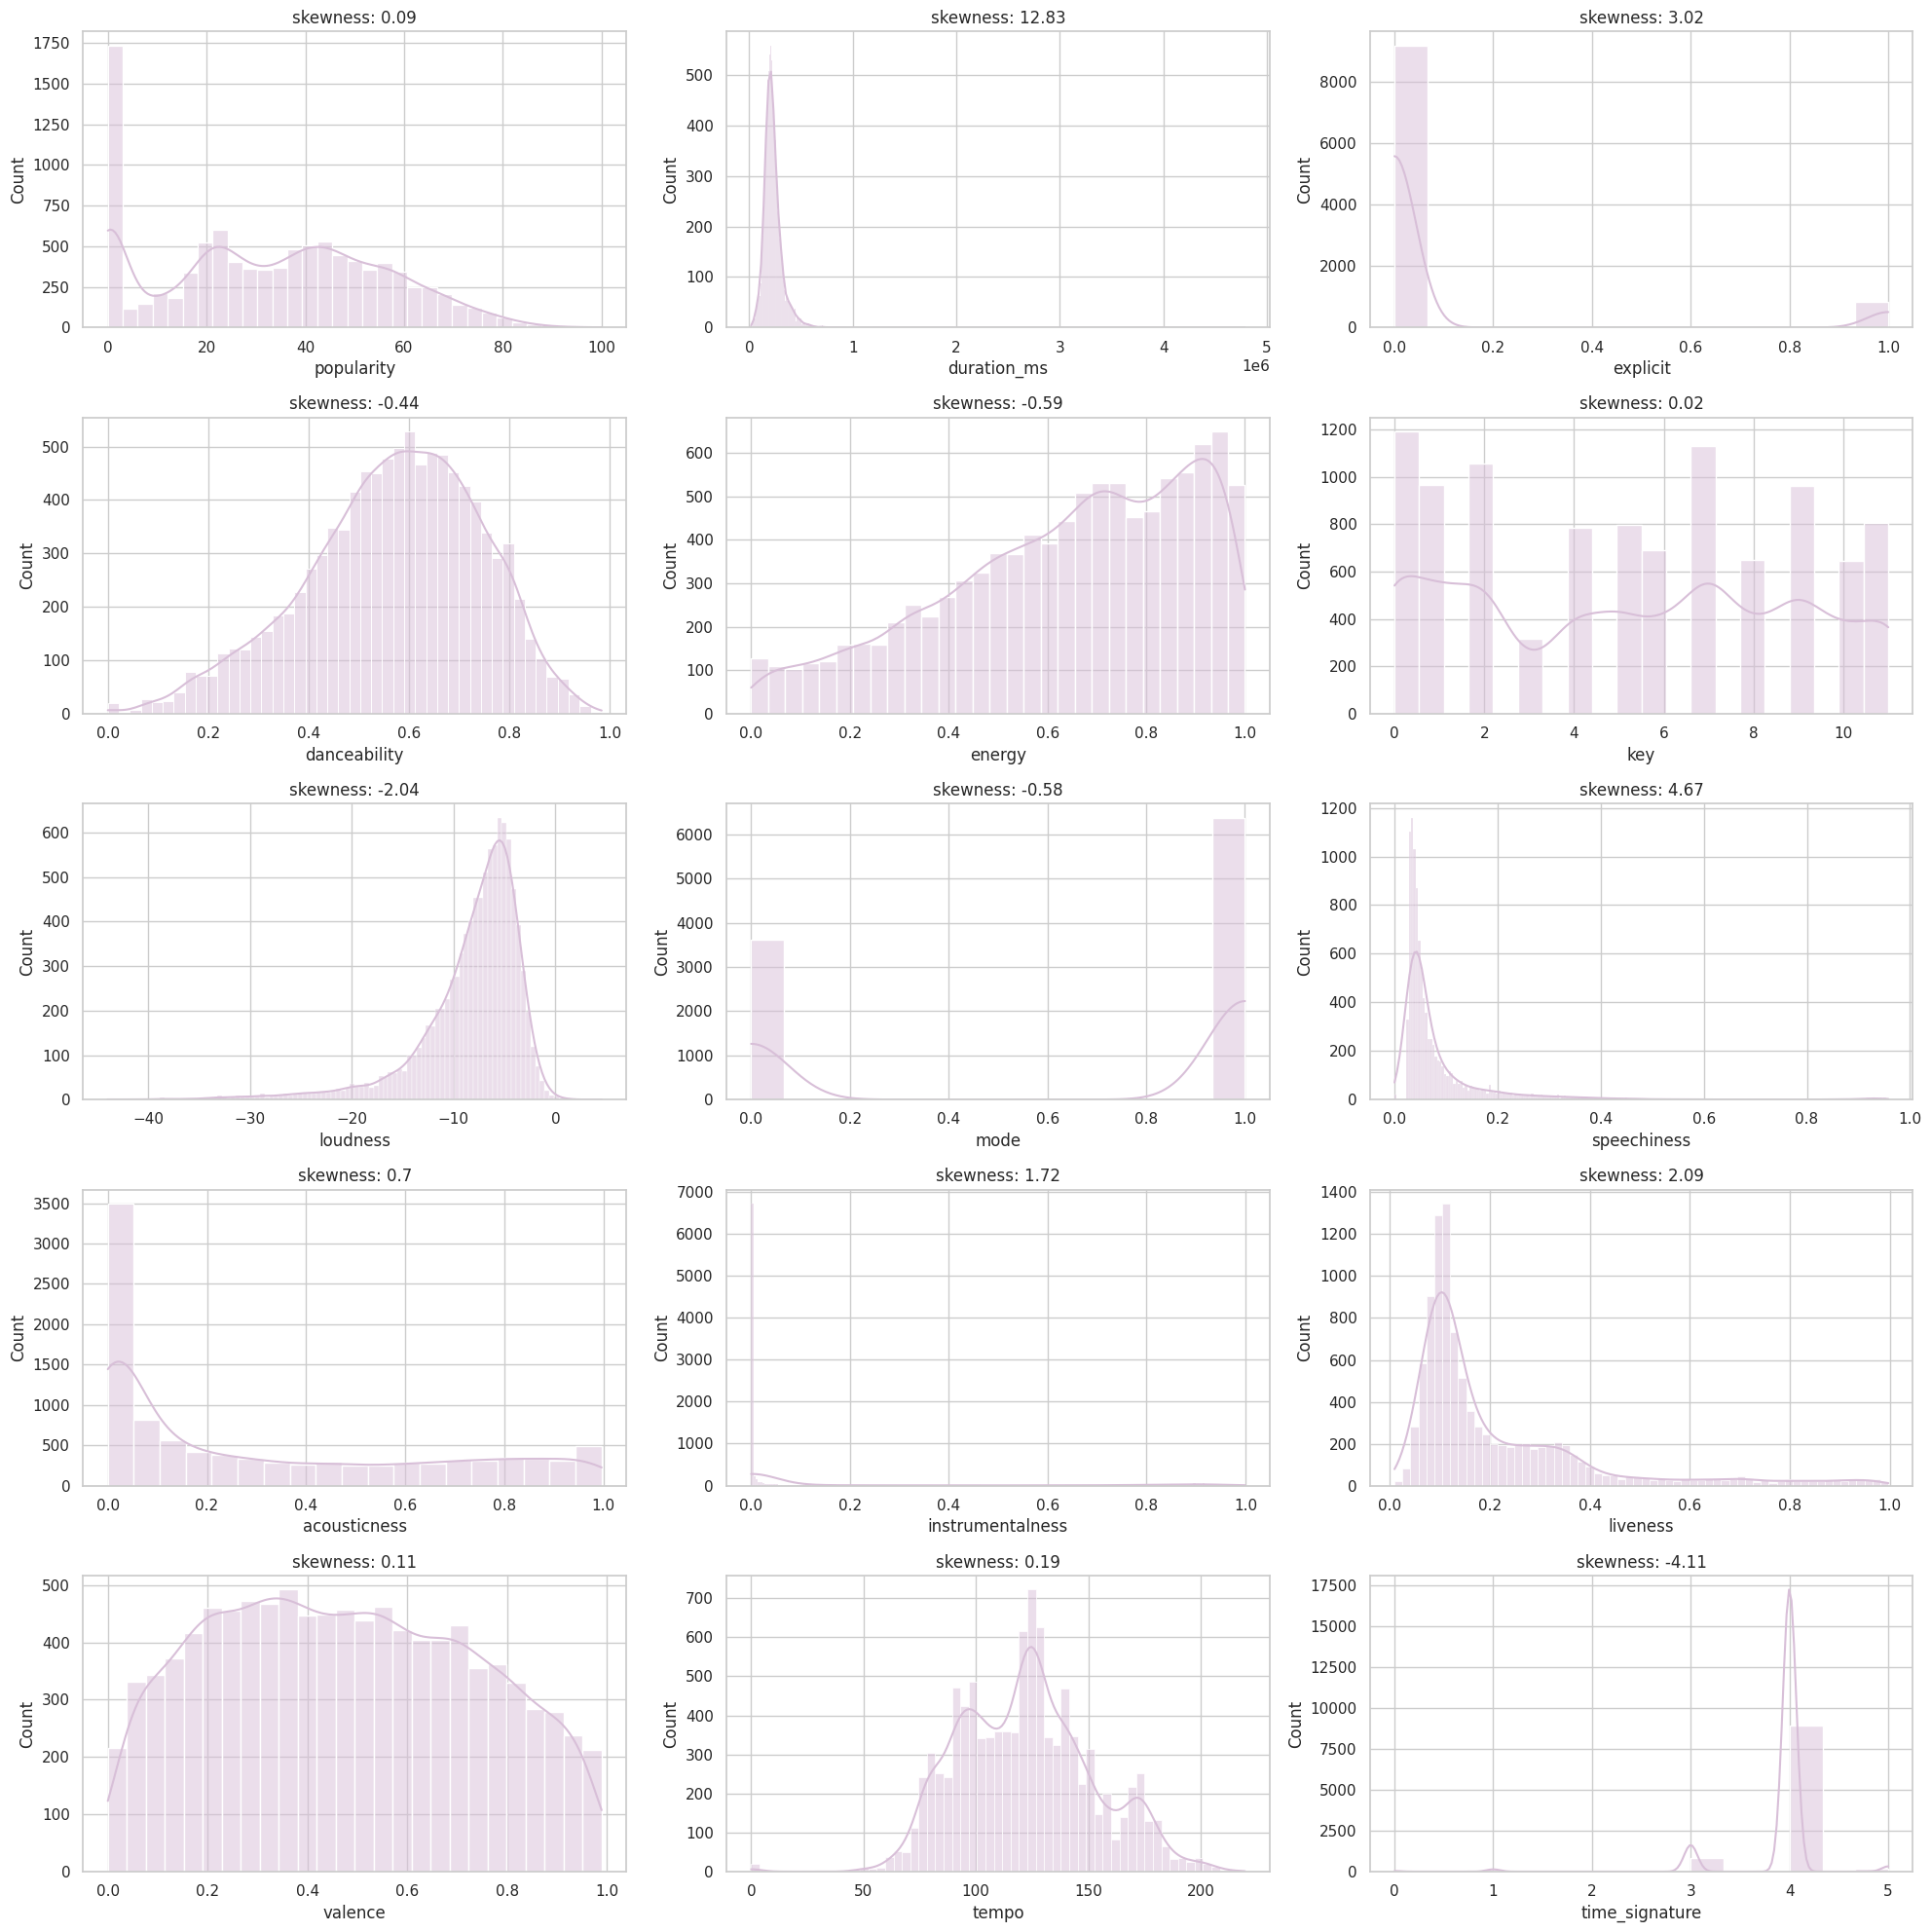

In [ ]:
t = 1
plt.figure(figsize=(20, 20))
for i in num_colms:
    plt.subplot(5, 3, t)
    sns.histplot(data[i], kde=True,color='thistle')
    plt.title(f'skewness: {round(data[i].skew(), 2)}')
    t += 1
plt.tight_layout()
plt.show()

### ***Inferences:***

> * Distribution Patterns: The plots show right-skewed distributions with longer tails toward higher values.
* Density Plots: Density plots highlight the right-skewed tendencies.
* Data Nature: Data is likely non-negative, anchored at zero.
* Outliers: Some plots suggest potential outliers in the right tail.
* Variability: Distributions differ in spread and shape, indicating diverse data characteristics.



## **Correlation Matrix Heatmap**

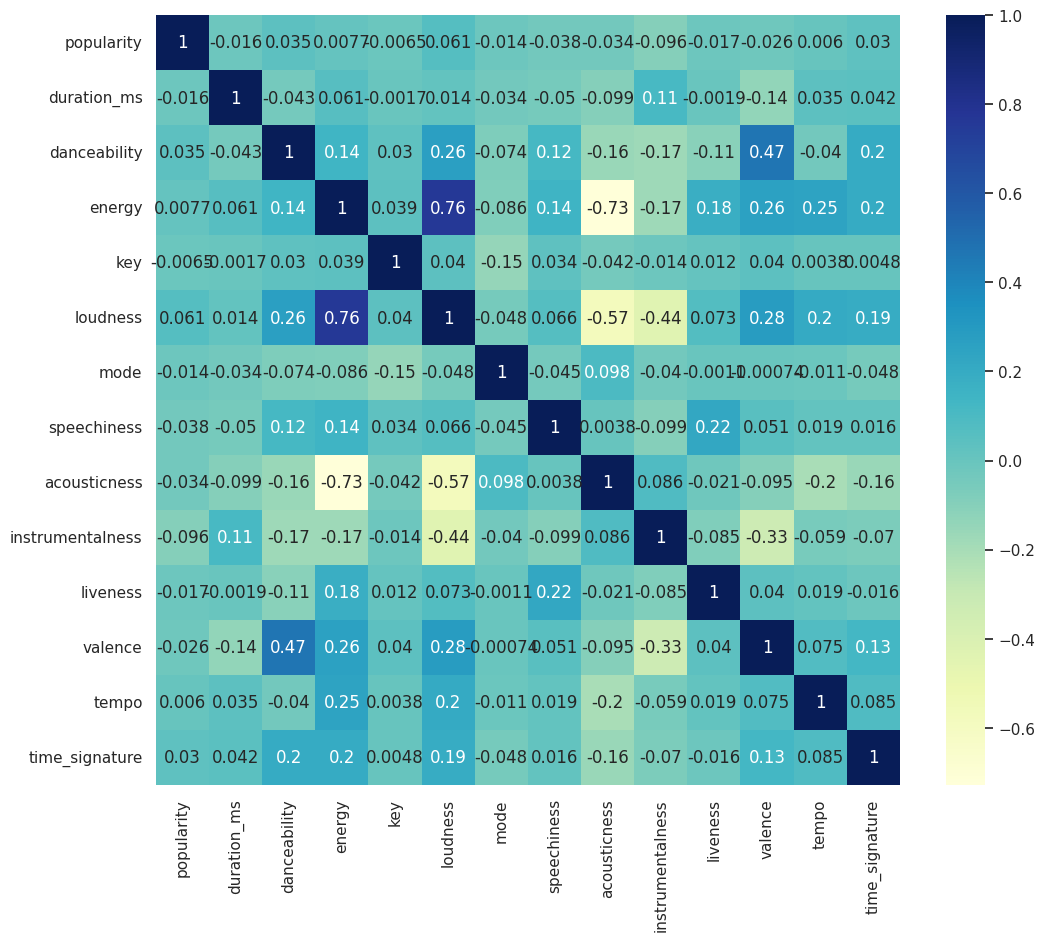

In [ ]:
num_colms = data.select_dtypes(include=['int64', 'float64'])
corr_data = num_colms.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_data, cmap="YlGnBu", annot=True)

plt.show()

## **Analyzing Categorical Data with Count Plots**

Visualizing ['explicit', 'key', 'mode', 'time_signature', 'genre'] highlights key categorical features affecting track characteristics. Excluding identifiers like track_id, artist, album, and track_name, which are difficult to visualize due to large data volumes, we'll check their percentage counts instead.

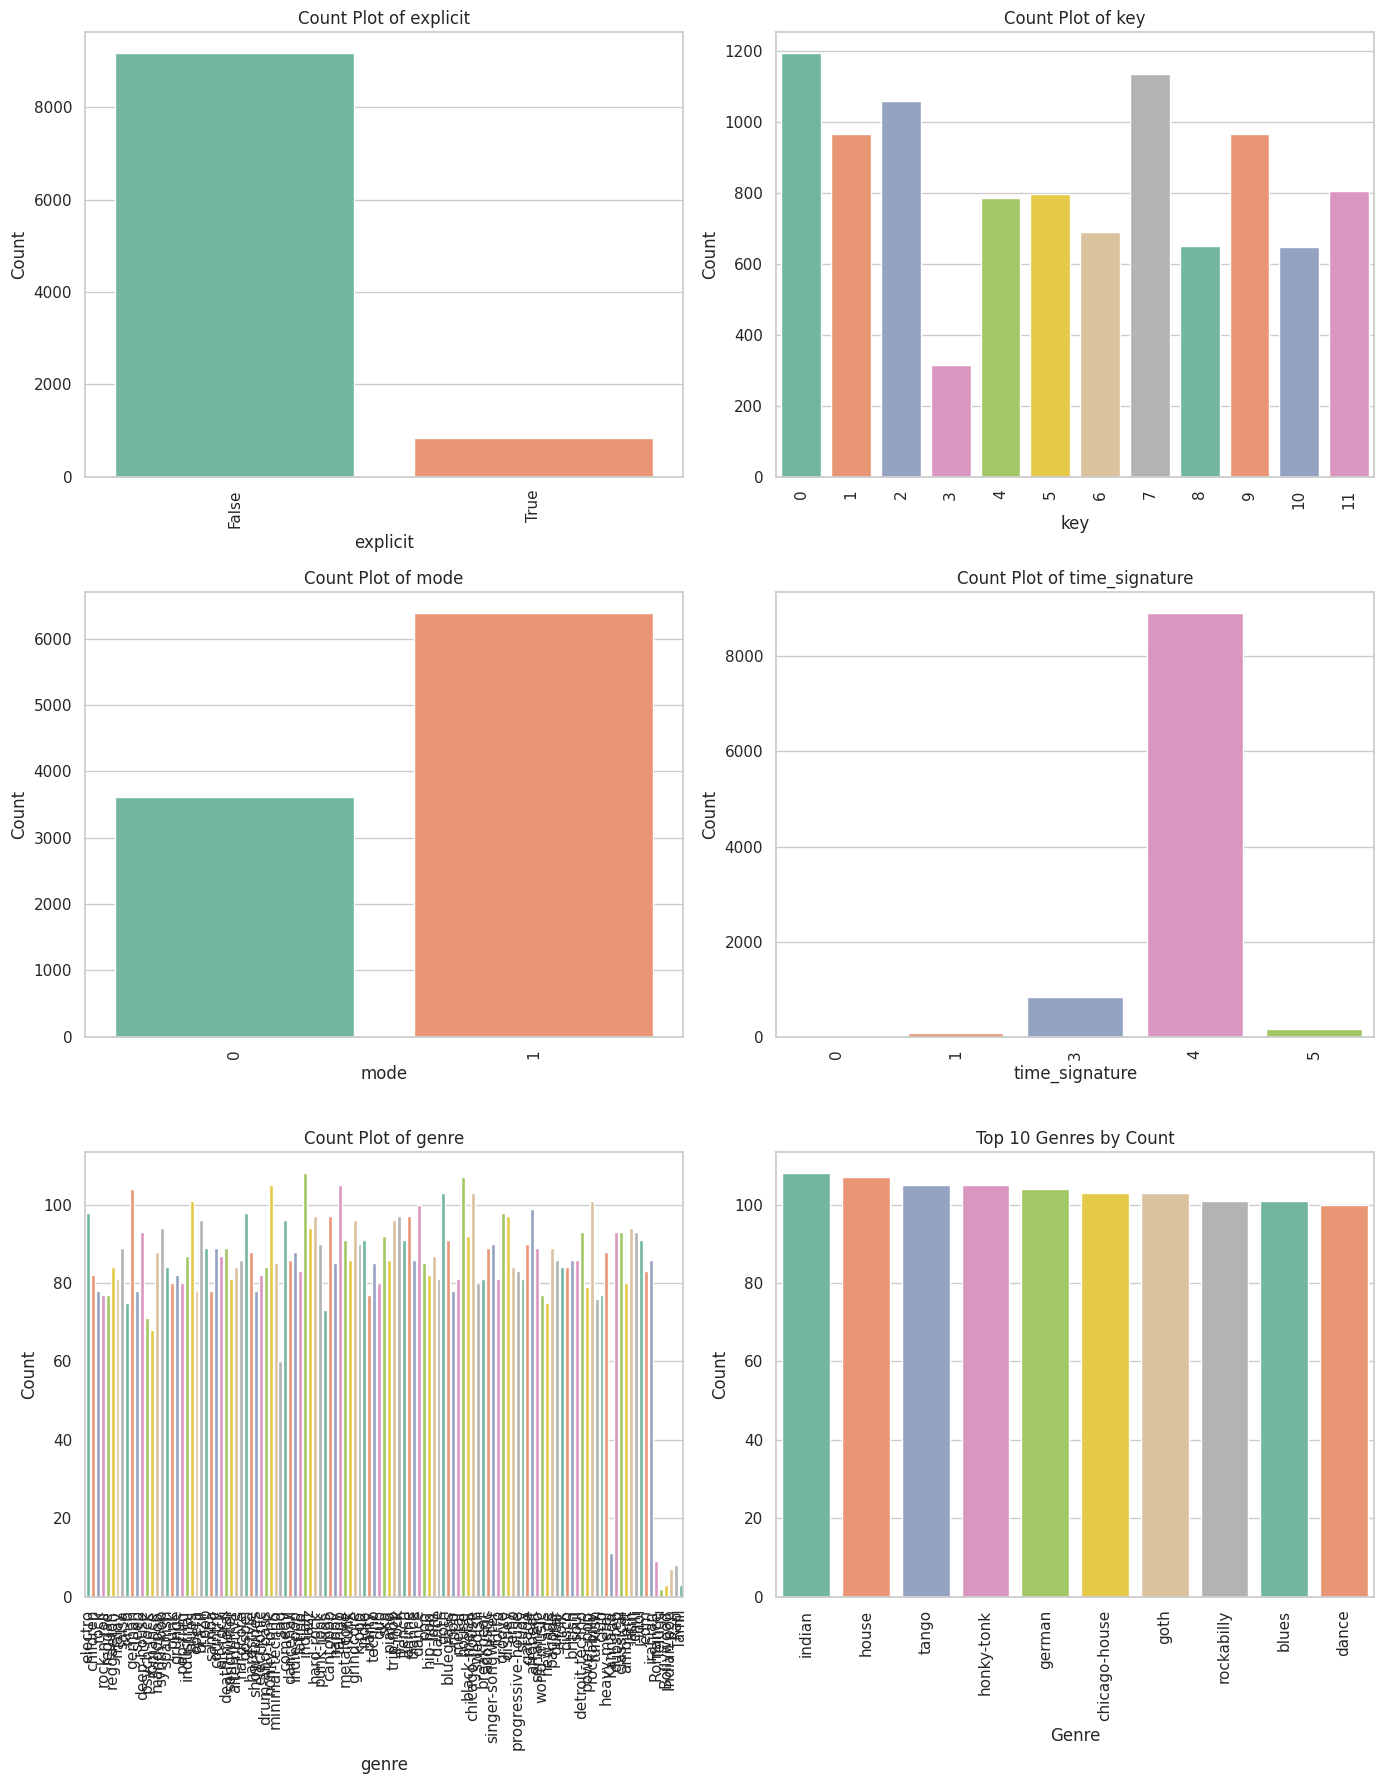

In [ ]:
palette = 'Set2'
columns = ['explicit', 'key', 'mode', 'time_signature', 'genre']
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

axes = axes.flatten()

# Create count plots for each categorical column
for i, column in enumerate(columns):
    sns.countplot(x=column, data=data_sampled, palette=palette, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Add the bar plot for the top 10 genres
sns.barplot(x=top_genres, y=data_sampled[data_sampled['genre'].isin(top_genres)]['genre'].value_counts(), palette=palette, ax=axes[-1])
axes[-1].set_title('Top 10 Genres by Count')
axes[-1].set_xlabel('Genre')
axes[-1].set_ylabel('Count')
axes[-1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
palette = sns.color_palette([
    '#1DB954',  #  Green
    '#3DCE7E',  # Softer Green
    '#A9D4A8',  # Very Light Green
    '#2B2B2B',  # Dark Gray
    '#7D7D7D',  # Medium Gray
    '#B0B0B0',  # Light Gray
    '#E0E0E0',  # Very Light Gray
    '#000000',  # Black
    '#3C3C3C'   # Darker Gray (slightly lighter than black)
])

## **Most Popular Music Genres**

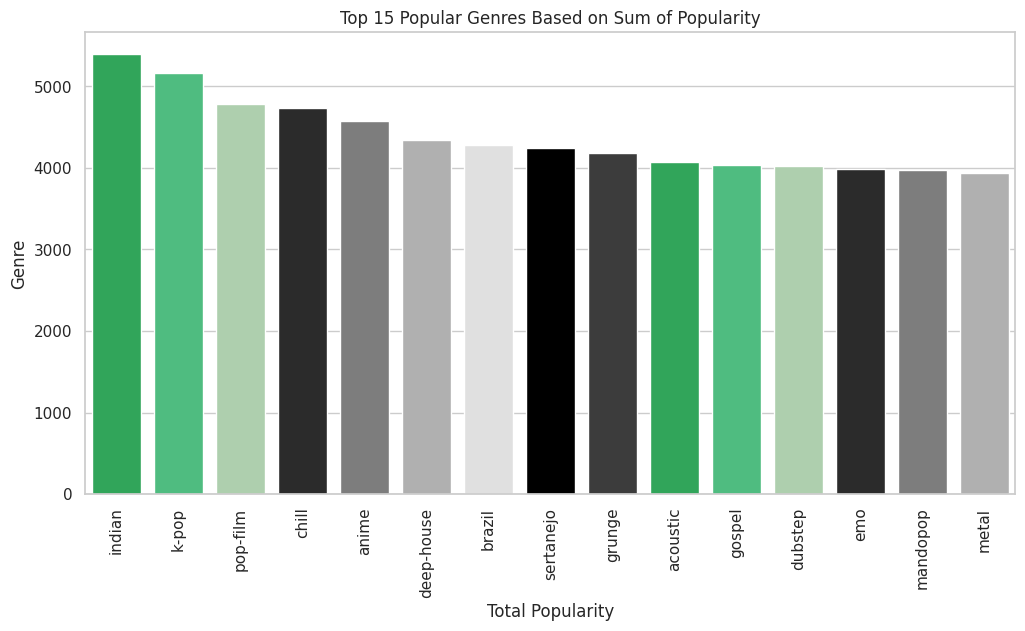

In [ ]:
# Group by genre and sum the popularity
genre_popularity = data.groupby('genre')['popularity'].sum().sort_values(ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=genre_popularity.values, x=genre_popularity.index, palette=palette)
plt.xlabel('Total Popularity')
plt.ylabel('Genre')
plt.title('Top 15 Popular Genres Based on Sum of Popularity')
plt.xticks(rotation=90)
plt.show()


## **Artists by Number of Tracks**

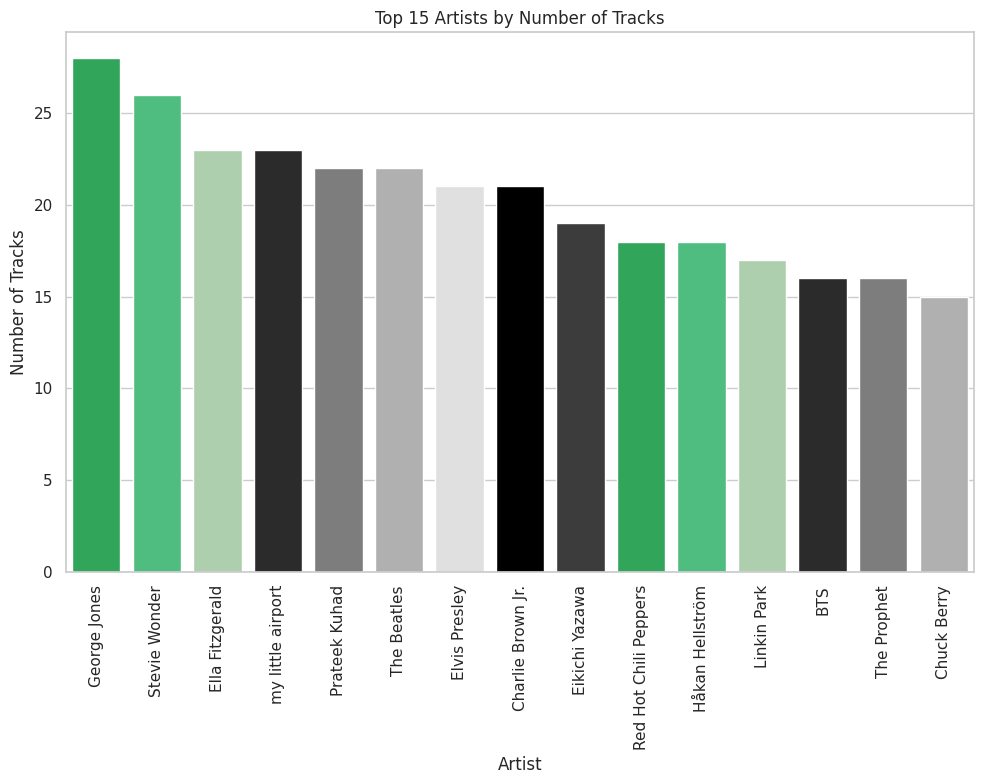

In [ ]:
# Group the data by 'artist' and count the number of tracks for each artist
artist_track_counts = data.groupby('artist')['track_name'].count().sort_values(ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=artist_track_counts.index, y=artist_track_counts.values, palette=palette)
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Top 15 Artists by Number of Tracks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## **Most Popular Artists**

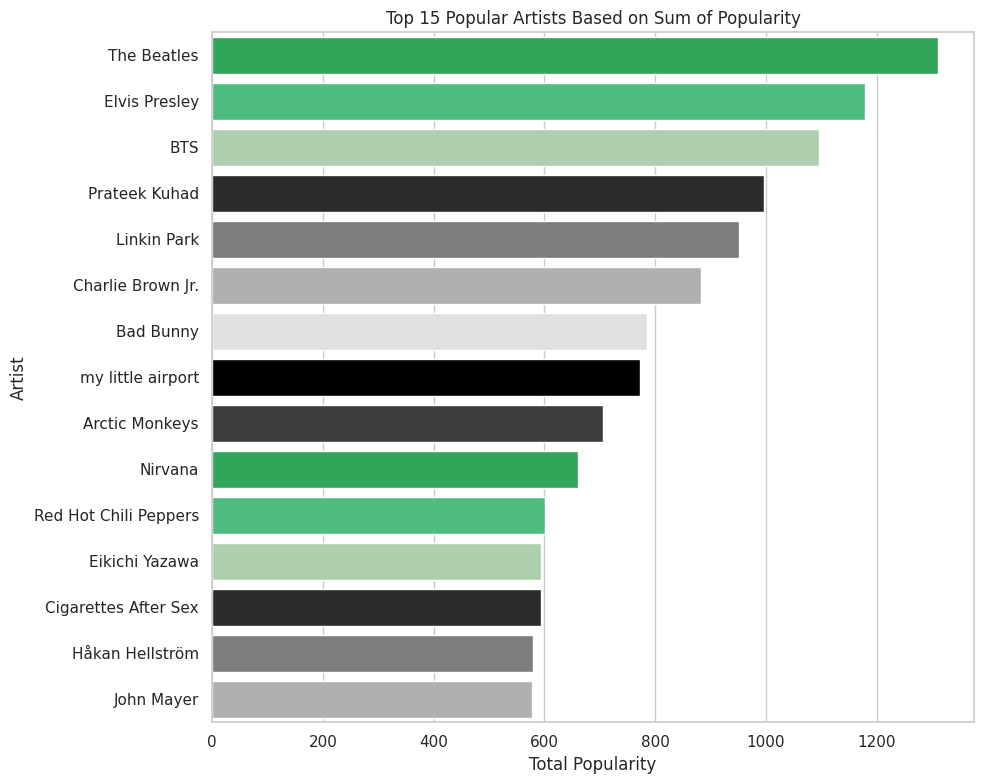

In [ ]:
# Group the data by 'artist' and sum the popularity for each artist
artist_popularity = data.groupby('artist')['popularity'].sum().sort_values(ascending=False).head(15)


# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette=palette)
plt.xlabel('Total Popularity')
plt.ylabel('Artist')
plt.title('Top 15 Popular Artists Based on Sum of Popularity')
plt.tight_layout()
plt.show()


## **Most Popular Songs**

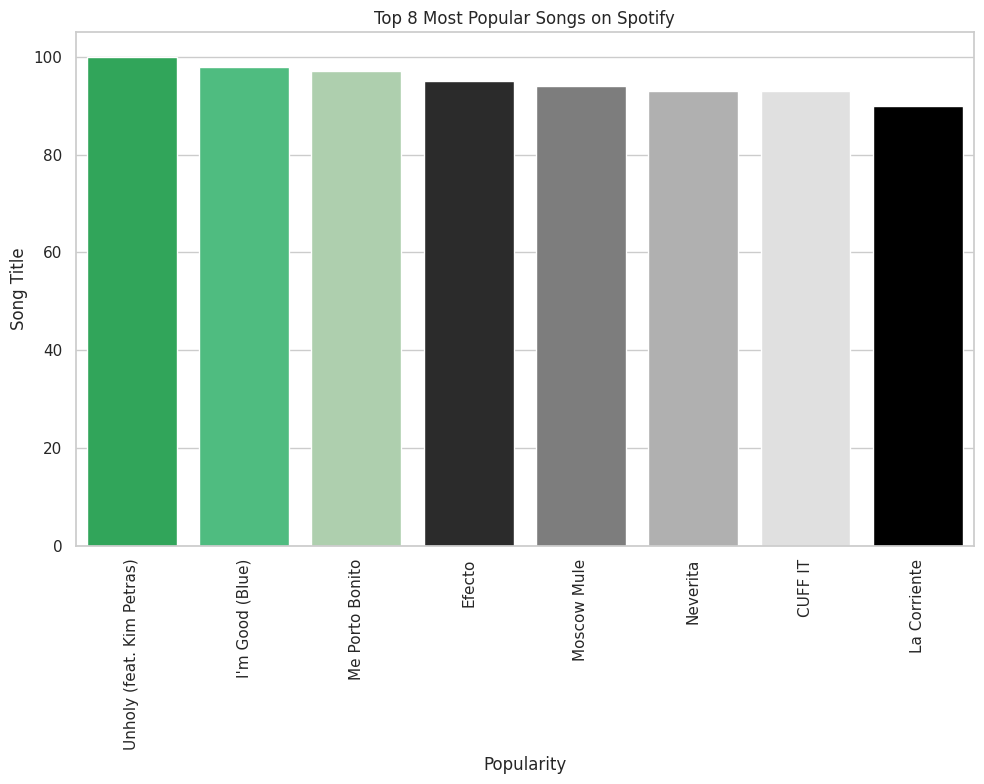

In [ ]:
# Group the data by 'track_name' and get the maximum popularity for each song
song_popularity = data.groupby('track_name')['popularity'].max().sort_values(ascending=False).head(8)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(y=song_popularity.values, x=song_popularity.index, palette=palette)
plt.xlabel('Popularity')
plt.ylabel('Song Title')
plt.title('Top 8 Most Popular Songs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Exploring Relationships in Data

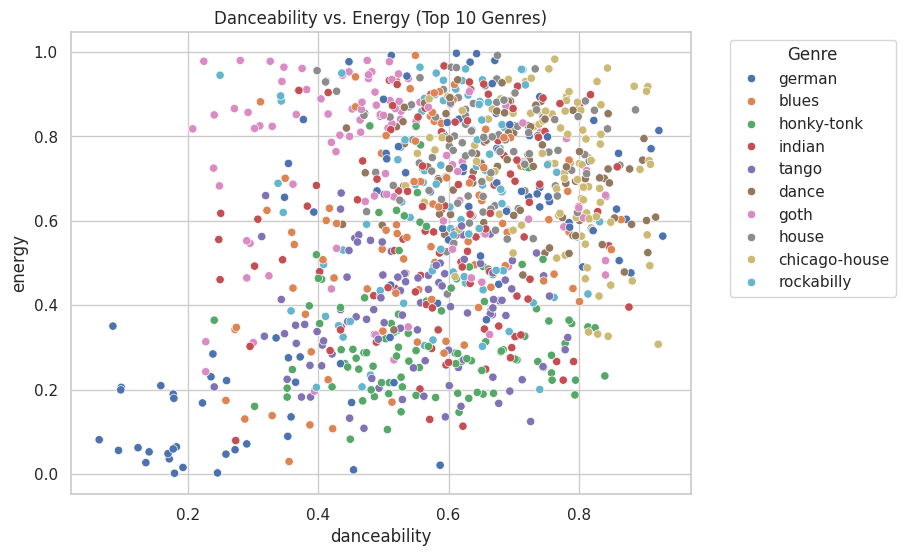

In [ ]:
# Filter the dataset to include only top 10 genres
filtered_data = data_sampled[data_sampled['genre'].isin(top_genres)]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data, x='danceability', y='energy', hue='genre')

plt.title('Danceability vs. Energy (Top 10 Genres)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### ***Inference:***


> * Danceability and energy levels vary by genre, with genres like dance and happy scoring higher.
* Some genres exhibit higher danceability and energy scores compared to others.
* Overlaps in danceability and energy levels across genres indicate shared characteristics.

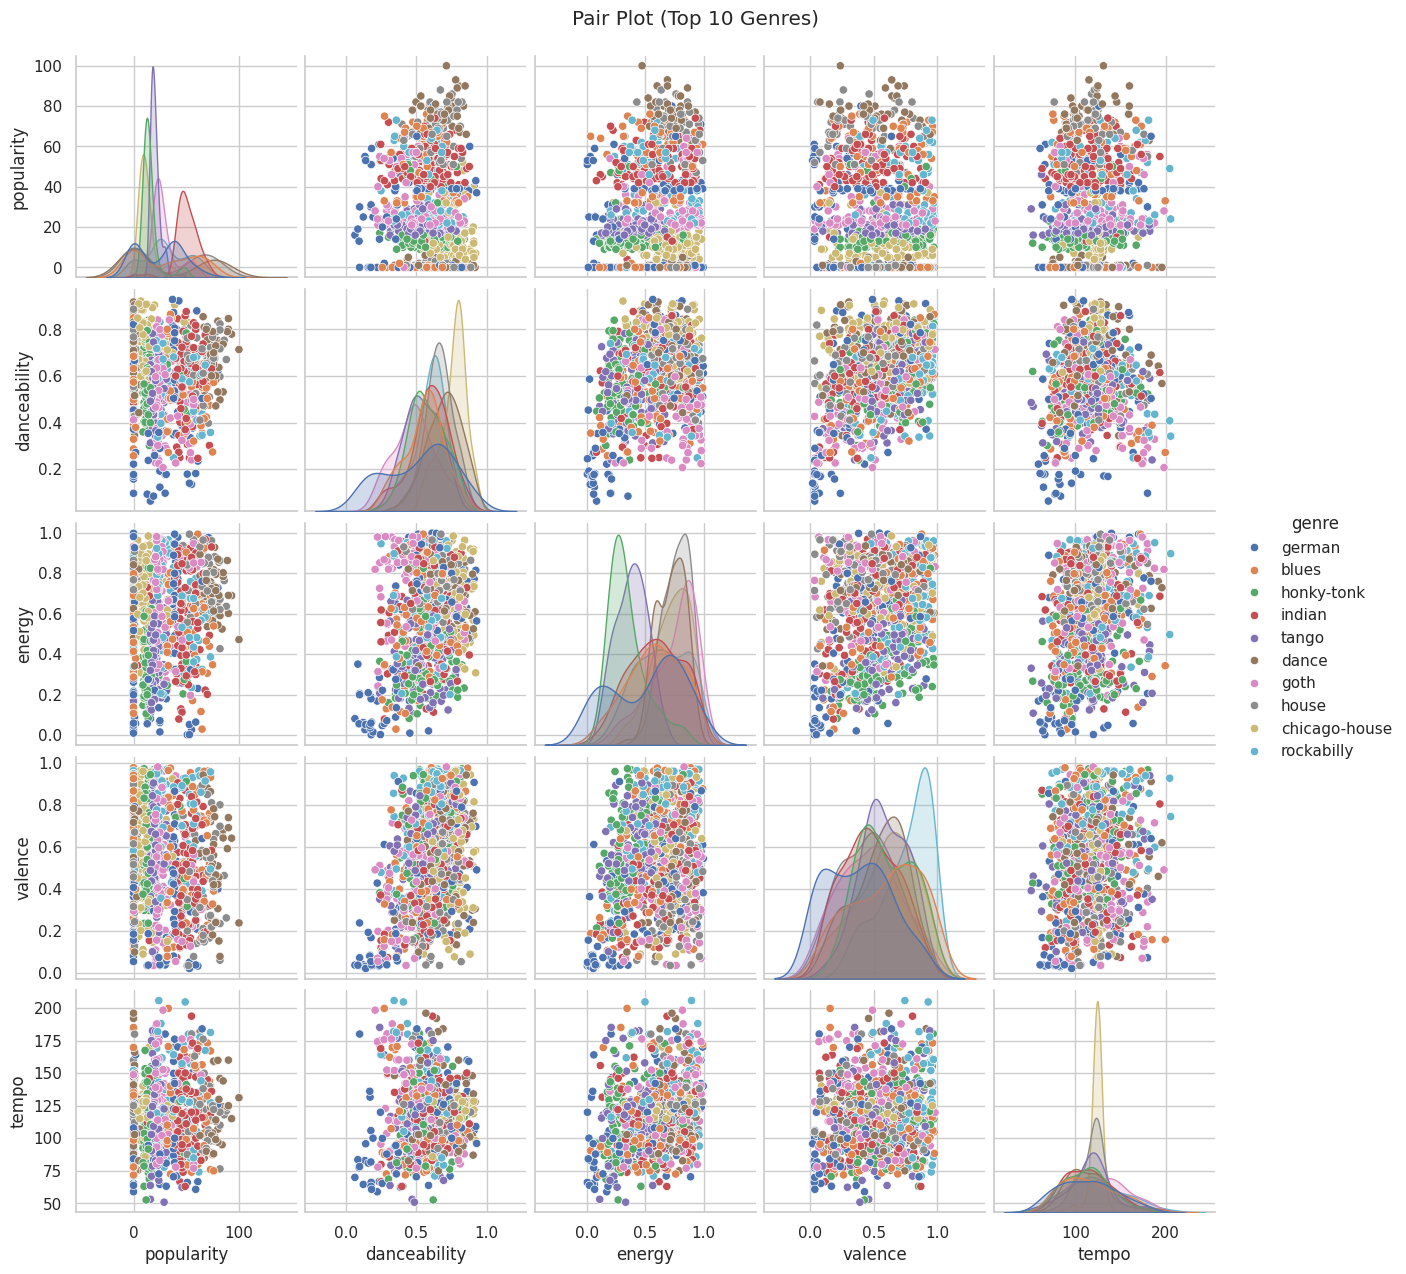

In [ ]:
# Filter the dataset to include only the top 10 genres
filtered_data = data_sampled[data_sampled['genre'].isin(top_genres)]

sns.pairplot(filtered_data, vars=['popularity', 'danceability', 'energy', 'valence', 'tempo'], hue='genre', diag_kind='kde')

plt.suptitle('Pair Plot (Top 10 Genres)', y=1.02)
plt.show()

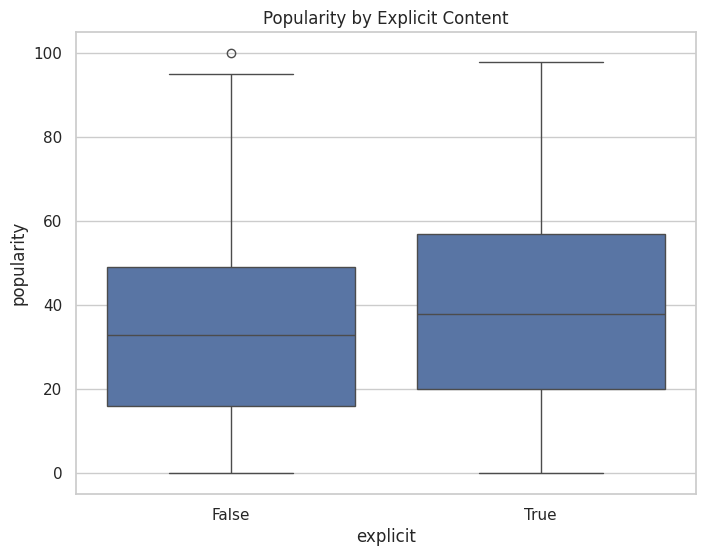

In [ ]:
# Box Plot: Popularity across explicit and non-explicit tracks
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_sampled, x='explicit', y='popularity')
plt.title('Popularity by Explicit Content')
plt.show()

### **Danceability Distribution Across Genres and Explicit Content**
Overall, the visualization highlights the diverse nature of danceability across music genres and provides a foundation for further analysis to understand the relationship between danceability, genre, and explicit content.

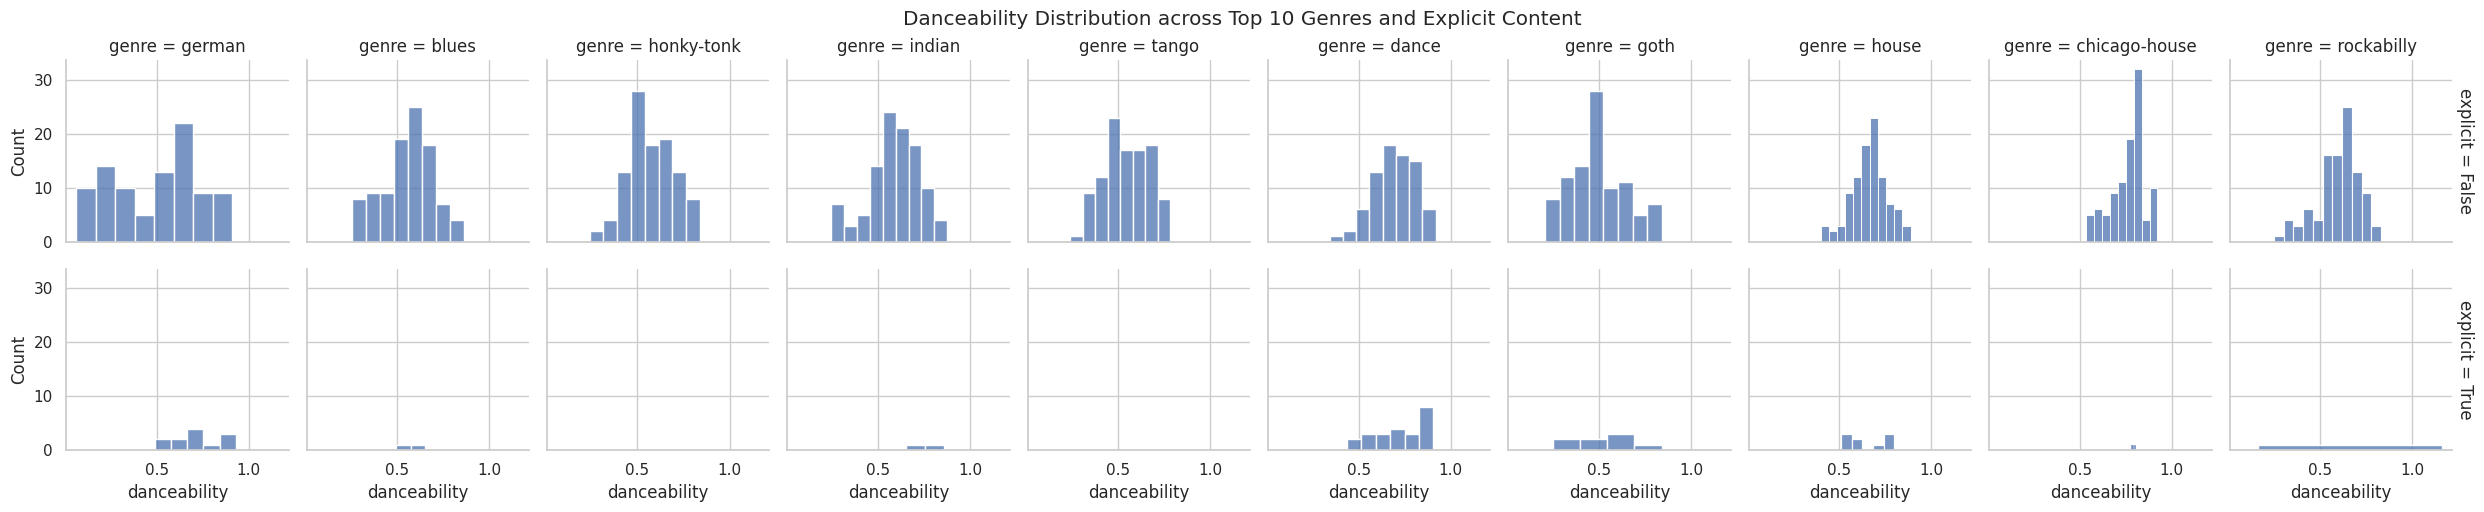

In [ ]:
# Filter the dataset to include only the top 10 genres
filtered_data = data_sampled[data_sampled['genre'].isin(top_genres)]

g = sns.FacetGrid(filtered_data, col='genre', row='explicit', margin_titles=True, height=2.5)
g.map(sns.histplot, 'danceability')

plt.suptitle('Danceability Distribution across Top 10 Genres and Explicit Content', y=1.02)
plt.show()

### **Relationship Between Popularity and Categorical Variables**

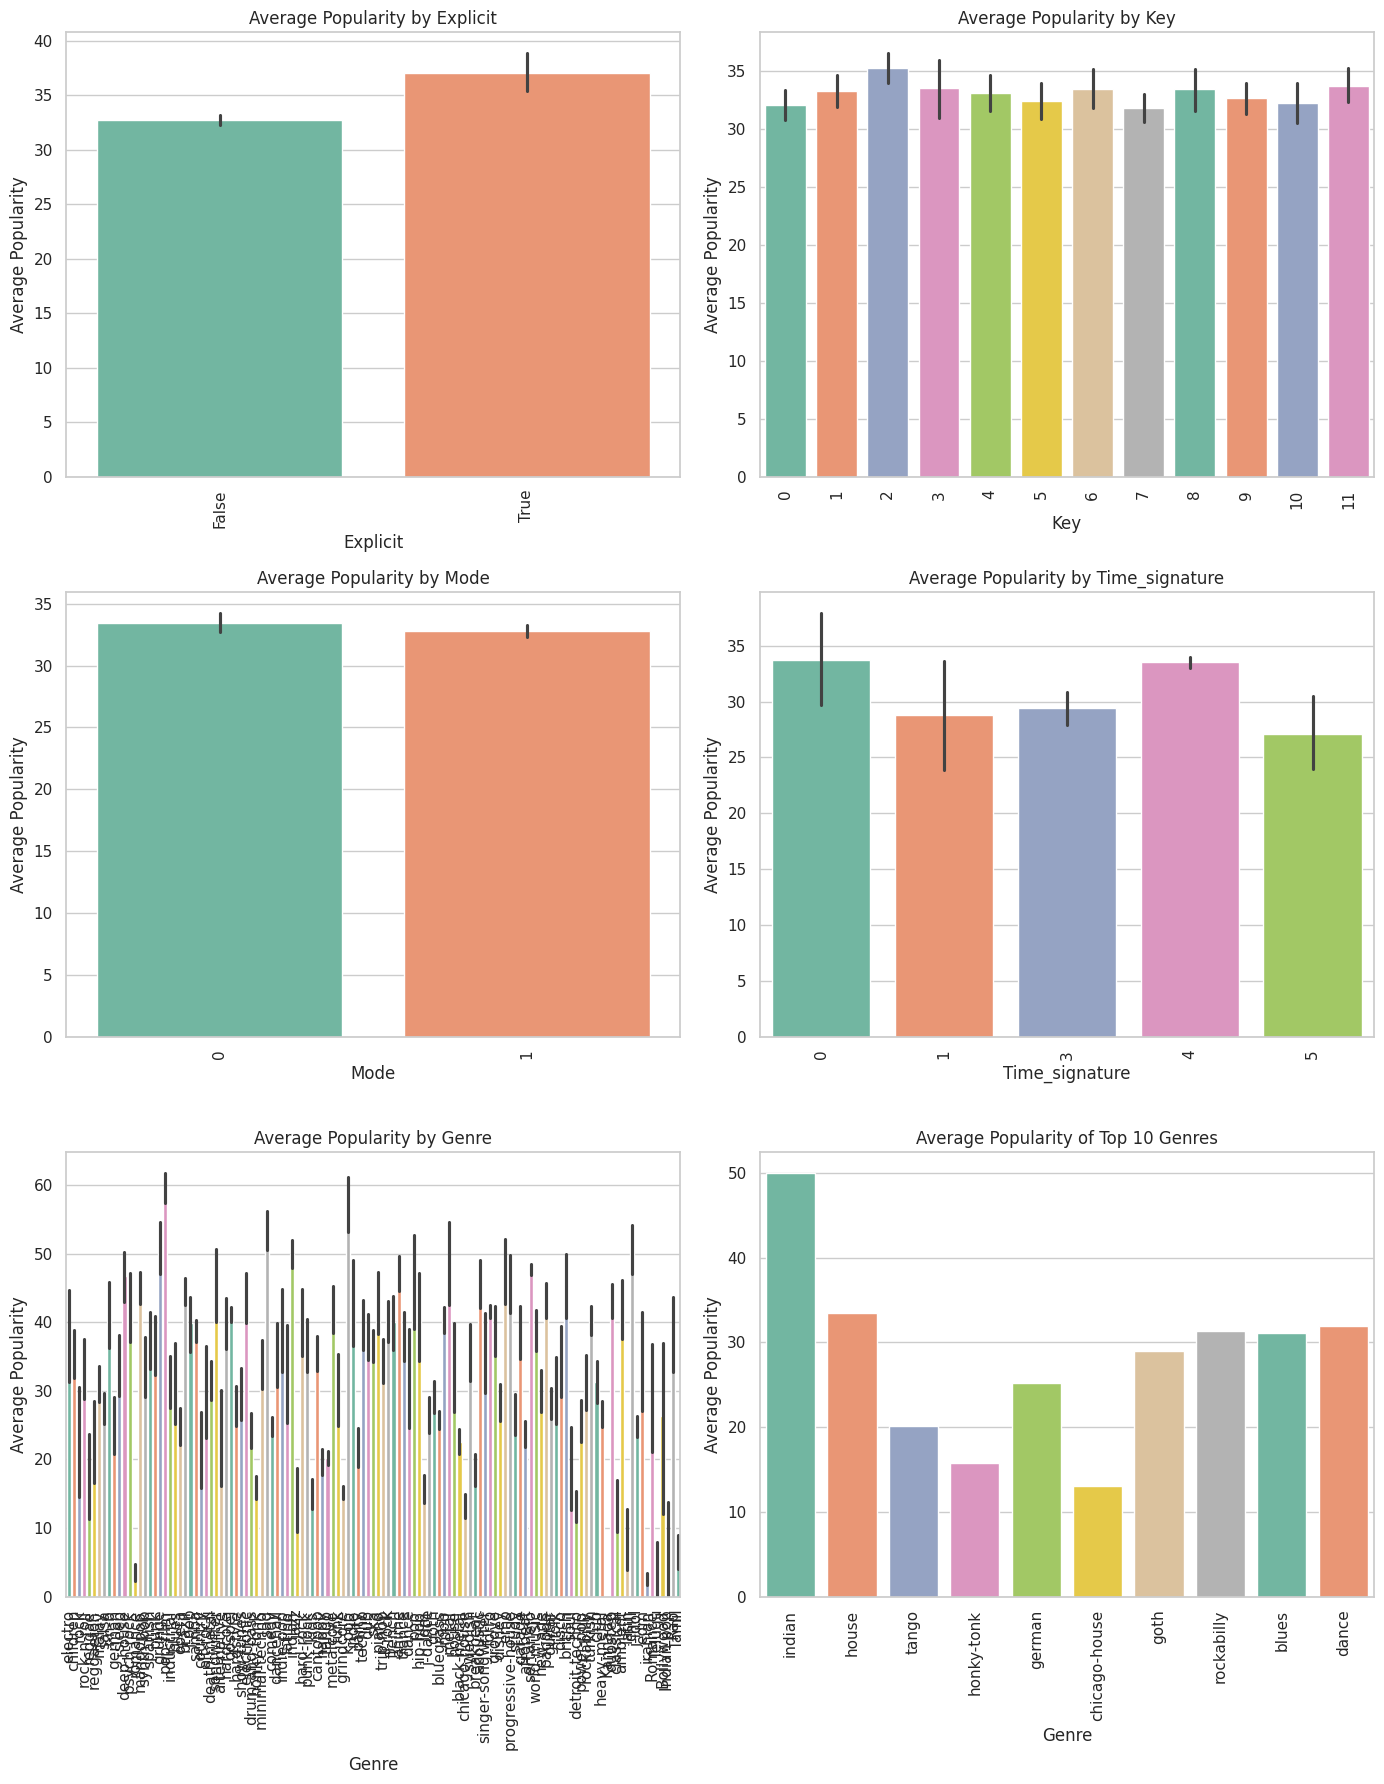

In [ ]:
palette = 'Set2'
columns = ['explicit', 'key', 'mode', 'time_signature', 'genre']
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()

# Create bar plots for each categorical column
for i, column in enumerate(columns):
        sns.barplot(x=column, y='popularity', data=data_sampled, palette=palette, ax=axes[i], estimator=np.mean)
        axes[i].set_title(f'Average Popularity by {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_ylabel('Average Popularity')
        axes[i].tick_params(axis='x', rotation=90)

# Add the bar plot for the top 10 genres
sns.barplot(x=top_genres, y=[data_sampled[data_sampled['genre'] == genre]['popularity'].mean() for genre in top_genres], palette=palette, ax=axes[-1])
axes[-1].set_title('Average Popularity of Top 10 Genres')
axes[-1].set_xlabel('Genre')
axes[-1].set_ylabel('Average Popularity')
axes[-1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# **Data Cleaning**

**Handling Missing Values:** Since there is only one row with null values, it will be deleted to ensure dataset completeness.

In [ ]:
data[data.isnull().any(axis=1)]

,track_id,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre


In [ ]:
data.duplicated().sum()

4

In [ ]:
#Keep the first occurrence of duplicates
data = data.drop_duplicates(keep='first')

In [ ]:
data.drop(columns=['track_id', 'artist','track_name', 'album','time_signature','genre'],inplace=True)

In [ ]:
data.head(2)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
32394,67,181720,True,0.618,0.845,2,0.175,1,0.1320,0.114,0.000000,0.415,0.486,171.921
15294,28,149853,False,0.649,0.295,0,-10.695,1,0.0369,0.854,0.000009,0.130,0.546,131.766


## **Managing Outliers in Non-Normally Distributed Data**

Given that all columns in the dataset are not normally distributed (with p-values of 0 for each), traditional outlier removal methods, such as those based on standard deviations from the mean, may not be appropriate. Instead, the Interquartile Range (IQR) method should be utilized to identify and remove extreme outliers (IQR=2.5), as it is robust and effective for data that does not follow a normal distribution.

In [ ]:
num_col=['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
             'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo']

In [ ]:
import numpy as np
for i in num_col:
    q3,q1=np.quantile(data[i],(0.75,0.25))
    iqr=q3-q1
    ul=q3+2.5*iqr
    ll=q1-2.5*iqr
    data[i]=np.where(data[i]>ul,ul,data[i])
    data[i]=np.where(data[i]<ll,ll,data[i])

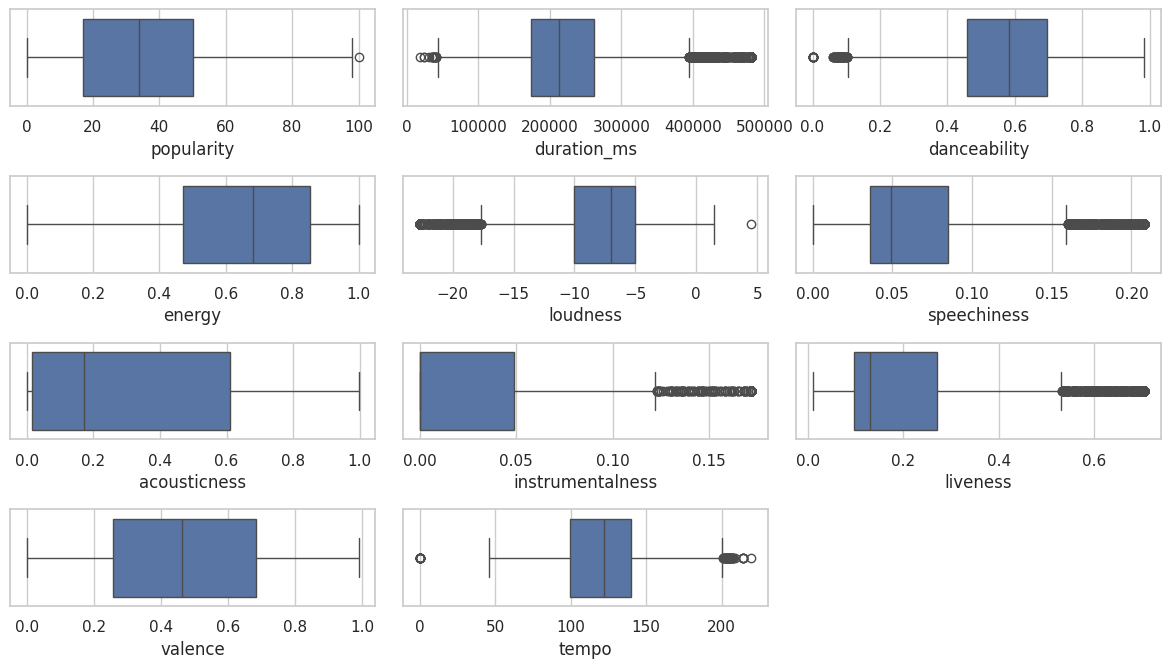

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
t=1
for i in num_col:
    plt.subplot(5,3,t)
    sns.boxplot(data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

The box plot indicates a reduction in the number of outliers.

# PCA

In [ ]:
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                      'valence', 'tempo']

In [ ]:
import pandas as pd
import numpy as np

# Standardize the selected sample
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features].astype('float32'))

# Perform PCA to retain 95% of the variance
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# K-Means Clustering

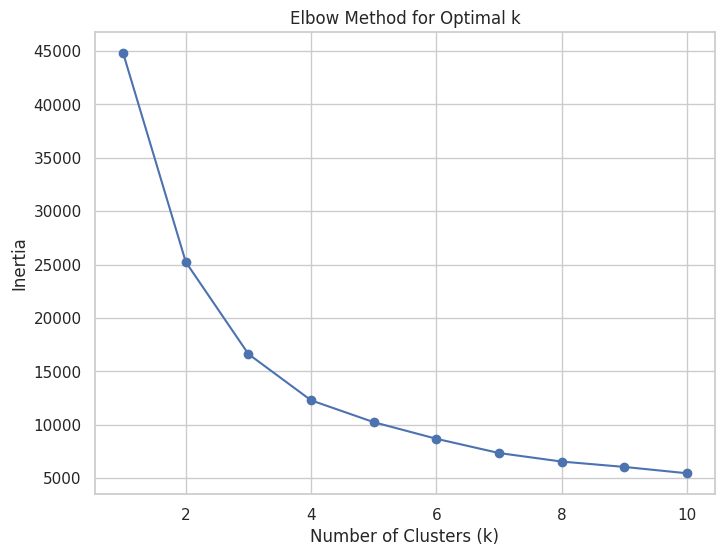

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# MiniBatch K-Means for large datasets
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


Silhouette Score for k=2: 0.4461892545223236
Silhouette Score for k=3: 0.38723382353782654
Silhouette Score for k=4: 0.38461020588874817
Silhouette Score for k=5: 0.34195223450660706
Silhouette Score for k=6: 0.3320016860961914
Silhouette Score for k=7: 0.3406886160373688
Silhouette Score for k=8: 0.34467288851737976
Silhouette Score for k=9: 0.3351033329963684
Silhouette Score for k=10: 0.33365651965141296


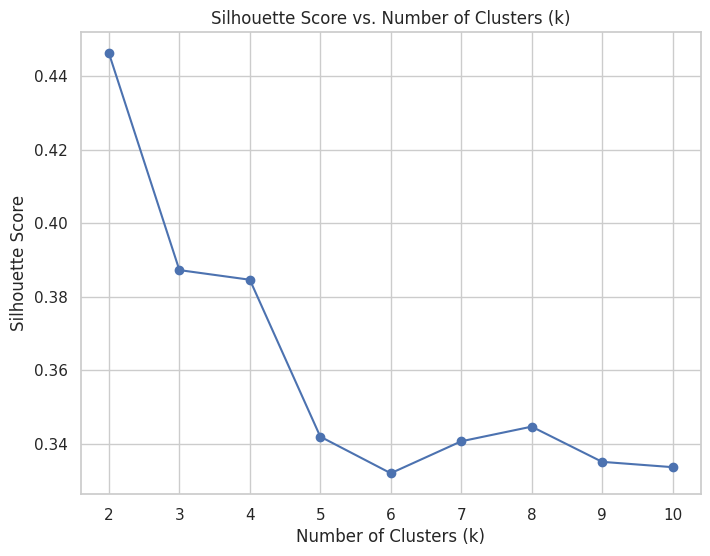

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of k values to try
k_values = range(2, 11)  # Test k from 2 to 10
silhouette_scores = []

# Loop through different values of k
for k in k_values:
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)  # Assuming pca_data is your PCA-transformed data

    # Calculate the silhouette score for the current k
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)

    print(f"Silhouette Score for k={k}: {score}")

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


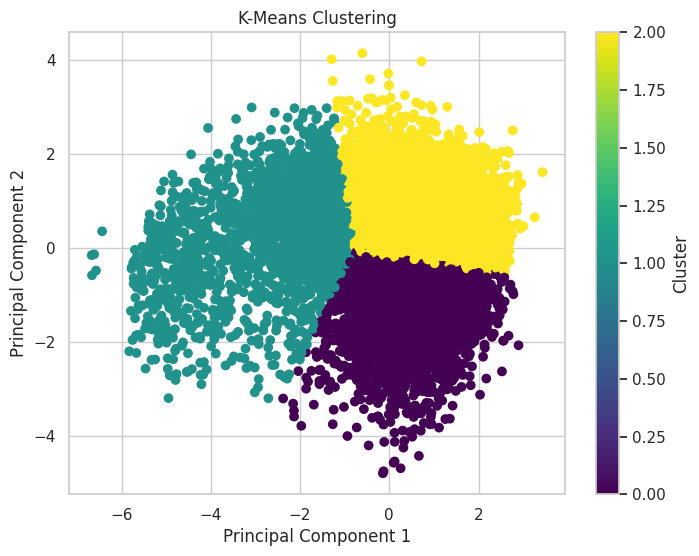

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data)
data['KMeans_Cluster'] = kmeans.labels_

# Visualize the clustering in the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# List of numerical features used for clustering
data.groupby('KMeans_Cluster')[numerical_features].mean()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
KMeans_Cluster,,,,,,,,,,,
0,32.744036,273090.179562,0.493083,0.790216,-6.434564,0.070605,0.087371,0.072482,0.227118,0.325593,133.760208
1,30.271442,208248.988595,0.465980,0.282729,-14.119801,0.047820,0.754778,0.070078,0.169440,0.303449,108.629635
2,34.551680,202581.312420,0.664784,0.705269,-6.520079,0.085236,0.265186,0.007903,0.209480,0.648910,120.891278


#Target Market Segmentation Based on K-Means Clustering

The dataset has been grouped into three distinct clusters based on the K-Means algorithm. Each cluster represents a unique segment of songs with shared characteristics across various features such as popularity, danceability, energy, loudness, etc.


Below is a breakdown of each cluster and recommendations for the target market:

## Cluster 0: Mainstream Pop Segment

#### Key Features:

- Popularity: Moderate (32.74).
- Danceability: Moderate (0.49).
- Energy: High (0.79), indicating that these tracks are energetic and fast-paced.
- Loudness: High (-6.43 dBFS), meaning these tracks are louder than average.
- Acousticness: Low (0.09), suggesting heavily produced, non-acoustic tracks.
- Tempo: High (133.76 BPM), making these songs faster-paced and upbeat.

**Recommended Target Market:**

This cluster is ideal for high-energy, mainstream tracks that cater to listeners who enjoy upbeat, fast-paced music. These songs are perfect for:

- Workout or gym playlists, where energy and tempo are key factors.
- Electronic dance music (EDM) lovers, who seek energetic, non-acoustic tracks.
- Nightclubs or party playlists, where high loudness and energy drive the atmosphere.

## Cluster 1: High-Energy and Upbeat Songs


#### Key Features:

- Popularity: Lower (30.27).
- Danceability: Moderate (0.47).
- Energy: Very low (0.28), making these tracks more relaxed and mellow.
- Loudness: Very low (-14.12 dBFS), indicating quieter, softer tracks.
- Acousticness: Very high (0.75), suggesting these songs have strong acoustic elements.
- Tempo: Slower (108.63 BPM), contributing to the laid-back feel.

**Recommended Target Market**

This cluster represents low-energy, acoustic music that appeals to a niche market of listeners who prefer softer, more natural-sounding tracks. This segment is suitable for:

- Acoustic or folk music fans, who appreciate organic, quieter sounds.
- Relaxation or study playlists, where softer, low-energy music creates a calming atmosphere.
- Coffee shop or background music, where low loudness and slower tempo provide a peaceful ambiance.

## Cluster 2: Acoustic, Low-Energy Niche

#### Key Features:

- Popularity: Highest among the clusters (34.55).
- Danceability: High (0.66), indicating these tracks are well-suited for dancing.
- Energy: Moderate (0.71), providing a good balance of intensity.
- Loudness: High (-6.52 dBFS), similar to Cluster 0, but with more danceability.
- Acousticness: Moderate (0.27), suggesting a mix of electronic and acoustic elements.
- Tempo: Moderate (120.89 BPM), making these tracks well-suited for general listening.

**Recommended Target Market:**

This cluster represents danceable, balanced-energy tracks that appeal to a broad audience. These songs are perfect for:

- Mainstream dance playlists, where both danceability and balanced energy are key.
- Pop music fans, as these tracks are relatively popular and maintain a good balance between energy and danceability.
- Fitness or casual party playlists, where danceable, moderately energetic tracks are needed for a fun, active atmosphere.


## Conclusion:
**Cluster 0:**

- High-energy, upbeat songs for gym-goers, EDM fans, and party enthusiasts.

**Cluster 1:**

- Low-energy, acoustic tracks for relaxation, study playlists, and acoustic music fans.

**Cluster 2:**

- Danceable, balanced-energy songs for mainstream listeners, pop music fans, and general playlists.


By tailoring marketing strategies and playlist placements to the unique characteristics of each cluster, artists and marketers can better reach and engage their target audiences in the music industry.